In [1]:
#Author: Tahís Ahtty
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
nltk.download('stopwords')
import string
import re
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [3]:
#import spacy
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [4]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

# Análisis del Dataset
## En busca de features relevantes para el análisis

In [5]:
##Cambiar al path correspondiente en su directorio
articles=pd.read_csv("C:/Users/User/Thalia/Espol/2018-2S/Mineria/noticiasVenezuela/noticias_Venezuela.csv")
articles

,fecha,url,titulo,texto,categoria
0,2018-12-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud
1,2018-12-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion
2,2018-12-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica
3,2018-12-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia
4,2018-12-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia
5,2018-12-03T16:09:00,https://www.eluniverso.com/noticias/2018/12/03...,El presidente de Turquía ofrece ayuda a Nicolá...,Caracas -El presidente turco Recep Tayyip Erdo...,Politica
6,2018-11-23T16:09:00,https://www.eluniverso.com/noticias/2018/11/23...,Ecuador busca donaciones de unos 550 millones ...,Quito -Ecuador necesita unos 550 millones de d...,Salud
7,2018-11-23T00:00:00,https://www.eluniverso.com/noticias/2018/11/23...,"Alejandro Andrade, el guardaespaldas de Hugo C...",Alejandro Andrade pasó de ser guardaespaldas d...,Represion
8,2018-11-30T00:00:00,https://www.eluniverso.com/noticias/2018/11/30...,Nicolás Maduro eleva el sueldo mínimo en Venez...,"El presidente de Venezuela, Nicolás Maduro, an...",Economia
9,2018-11-24T00:00:00,https://www.eluniverso.com/noticias/2018/11/24...,Jair Bolsonaro: No 'devolveremos' a migrantes ...,Río de Janeiro - El presidente electo de Brasi...,Politica


## Observación inicial de las columnas y la variable outcome

In [17]:
##Para ver si el dataset tiene valores nulos
print("CANITIDAD VALORES POR COLUMNA\n")
print articles.count()
print("----------------------------------------------\n")
##Copio dataset para manipular la copia y evitar pérdida de datos
print("15 REGISTROS DE LA COPIA\n")
noticias = articles
noticias.head(15)

CANITIDAD VALORES POR COLUMNA

fecha        313
url          313
titulo       313
texto        313
categoria    313
dtype: int64
----------------------------------------------

15 REGISTROS DE LA COPIA



,fecha,url,titulo,texto,categoria
0,2018-12-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud
1,2018-12-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion
2,2018-12-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica
3,2018-12-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia
4,2018-12-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia
5,2018-12-03T16:09:00,https://www.eluniverso.com/noticias/2018/12/03...,El presidente de Turquía ofrece ayuda a Nicolá...,Caracas -El presidente turco Recep Tayyip Erdo...,Politica
6,2018-11-23T16:09:00,https://www.eluniverso.com/noticias/2018/11/23...,Ecuador busca donaciones de unos 550 millones ...,Quito -Ecuador necesita unos 550 millones de d...,Salud
7,2018-11-23T00:00:00,https://www.eluniverso.com/noticias/2018/11/23...,"Alejandro Andrade, el guardaespaldas de Hugo C...",Alejandro Andrade pasó de ser guardaespaldas d...,Represion
8,2018-11-30T00:00:00,https://www.eluniverso.com/noticias/2018/11/30...,Nicolás Maduro eleva el sueldo mínimo en Venez...,"El presidente de Venezuela, Nicolás Maduro, an...",Economia
9,2018-11-24T00:00:00,https://www.eluniverso.com/noticias/2018/11/24...,Jair Bolsonaro: No 'devolveremos' a migrantes ...,Río de Janeiro - El presidente electo de Brasi...,Politica


In [24]:
##Ver si hay valores nulos
print("NULOS POR COLUMNA\n")
col_nombres = noticias.columns.tolist()
for columna in col_nombres:
    print "Valores nulos en <{0}>: {1}".format(columna,noticias[columna].isnull().sum())
print("----------------------------------------------\n")
##Visualizo la columna categoría
print("COLUMNA CATEGORIA\n")
noticias.categoria.head(15)

NULOS POR COLUMNA

Valores nulos en <fecha>: 0
Valores nulos en <url>: 0
Valores nulos en <titulo>: 0
Valores nulos en <texto>: 0
Valores nulos en <categoria>: 0
----------------------------------------------

COLUMNA CATEGORIA



0         Salud
1     Represion
2      Politica
3      Economia
4      Economia
5      Politica
6         Salud
7     Represion
8      Economia
9      Politica
10     Politica
11    Represion
12    Represion
13       Hambre
14     Economia
Name: categoria, dtype: object

In [29]:
##Observo la cantidad de artículos por categoría
print("CANTIDAD POR CATEGORÍA\n")
noticias.categoria.value_counts()

CANTIDAD POR CATEGORÍA



Politica     112
Economia      57
Migracion     43
Represion     42
Sociedad      39
Salud         10
Hambre        10
Name: categoria, dtype: int64

Text(0.5,1,'Cantidad de noticias por categoria')

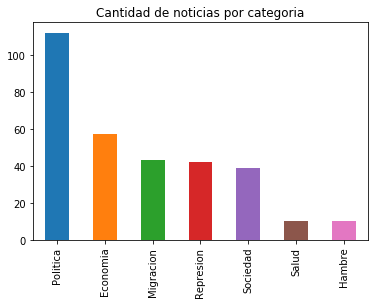

In [27]:
##Plot de los artículos por categoría
noticias.categoria.value_counts().plot.bar()
plt.title('Cantidad de noticias por categoria')

## Análisis por fecha
### Este análisis me permitirá analizar las noticias a través del tiempo

In [35]:
##Observamos los registros en la fecha
print("20 PRIMERAS FECHAS\n")
noticias.fecha.head(20)

20 PRIMERAS FECHAS



0     2018-12-14T00:00:00
1     2018-12-12T00:00:00
2     2018-12-12T18:10:00
3     2018-12-12T14:19:00
4     2018-12-04T15:47:00
5     2018-12-03T16:09:00
6     2018-11-23T16:09:00
7     2018-11-23T00:00:00
8     2018-11-30T00:00:00
9     2018-11-24T00:00:00
10    2018-11-22T00:00:00
11    2018-11-21T00:00:00
12    2018-11-21T00:00:00
13    2018-11-21T00:00:00
14    2018-11-20T00:00:00
15    2018-11-20T00:00:00
16    2018-11-18T00:00:00
17    2018-11-16T00:00:00
18    2018-11-13T00:00:00
19    2018-11-12T00:00:00
Name: fecha, dtype: object

In [39]:
##Hago un substring para extraer solo la fecha del isoformat existente en fecha
fecha_string=noticias['fecha'].apply(lambda x:x[0:10])
noticias['fecha_string'] = fecha_string
noticias.head(20)

,fecha,url,titulo,texto,categoria,fecha_string
0,2018-12-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-12-14
1,2018-12-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-12-12
2,2018-12-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-12-12
3,2018-12-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-12-12
4,2018-12-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-12-04
5,2018-12-03T16:09:00,https://www.eluniverso.com/noticias/2018/12/03...,El presidente de Turquía ofrece ayuda a Nicolá...,Caracas -El presidente turco Recep Tayyip Erdo...,Politica,2018-12-03
6,2018-11-23T16:09:00,https://www.eluniverso.com/noticias/2018/11/23...,Ecuador busca donaciones de unos 550 millones ...,Quito -Ecuador necesita unos 550 millones de d...,Salud,2018-11-23
7,2018-11-23T00:00:00,https://www.eluniverso.com/noticias/2018/11/23...,"Alejandro Andrade, el guardaespaldas de Hugo C...",Alejandro Andrade pasó de ser guardaespaldas d...,Represion,2018-11-23
8,2018-11-30T00:00:00,https://www.eluniverso.com/noticias/2018/11/30...,Nicolás Maduro eleva el sueldo mínimo en Venez...,"El presidente de Venezuela, Nicolás Maduro, an...",Economia,2018-11-30
9,2018-11-24T00:00:00,https://www.eluniverso.com/noticias/2018/11/24...,Jair Bolsonaro: No 'devolveremos' a migrantes ...,Río de Janeiro - El presidente electo de Brasi...,Politica,2018-11-24
